<a href="https://colab.research.google.com/github/Charanpoojary/STOCK-PRICE-PREDICTION-SUPERVISED-MACHINE-LEARNING-/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split  # train test split for data separation  
from sklearn.linear_model import LinearRegression     # importing the algorithm
from sklearn import metrics                           # importing metrics to check the model
%matplotlib inline

In [ ]:
import pandas as pd   # importing libraries that is needed for the operation
import numpy  as np
import matplotlib.pyplot as plt   # visualisation librar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/tesla.csv'
df=pd.read_csv(file_path)

In [ ]:
df.head()   # returns the top 5 rows of the dataset

In [ ]:
df.shape      # returns the rows and columnns of the dataset


In [ ]:
df.info()      # returns the information about the dataset

In [ ]:
df.describe()    # returns the information about numerical columns

In [ ]:
df.isnull().sum()   # checking for null values

In [ ]:
# there is no null values in the dataset

In [ ]:
df['Date']=pd.to_datetime(df.Date)   # converting date column into date time format

In [ ]:
df.drop('Adj Close', axis=1, inplace=True)   # droping column permanently

In [ ]:
print(f'Dataframe contains stock price between {df.Date.min()} {df.Date.max()}')   # checking the starting and ending date of the dataset

Dataframe contains stock price between 2010-01-07 00:00:00 2019-12-03 00:00:00


In [ ]:
print(f'Total days= {(df.Date.max() - df.Date.min()).days} days')  # calculating total days of the dataset

Total days= 3617 days


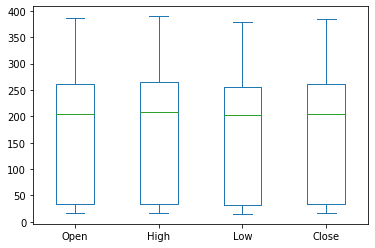

In [ ]:
df[['Open','High','Low','Close']].plot(kind='box')    # plotting bar graph for the dataset

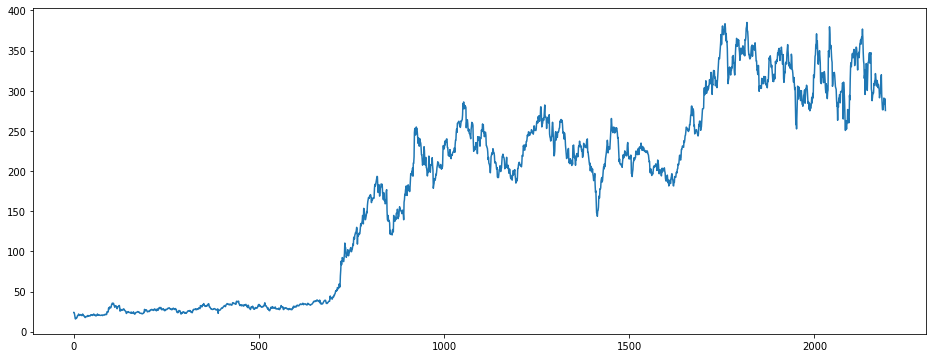

In [ ]:
# plottin the graph for close ( this is what we have to predict)
df['Close'].plot(figsize=(16,6))

In [ ]:
# building the regression model

In [ ]:
from sklearn.model_selection import train_test_split   # train test split to separate the dataset
from sklearn.preprocessing import MinMaxScaler         # for scaling our dataset
from sklearn.preprocessing import StandardScaler

In [ ]:
# metrics neeeded for evaluation
from sklearn.metrics import mean_squared_error as mse        
from sklearn.metrics import r2_score

In [ ]:
# splitting the data into train and test

In [ ]:
X= df[['Open','High','Low','Volume']]   # independant variable
Y= df['Close']                          # dependant variable

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=101)    # splitting the data

In [ ]:
X_train.shape    # checking the rows and column of the x_train

(1644, 4)

In [ ]:
X_test.shape      # checking rows and columns of the x_test

(549, 4)

In [ ]:
# feature scaling
scaler =StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression  # importing linear regresion
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
# creating a linear model
regressor=LinearRegression()
regressor.fit(X_train,Y_train)   # fitting the data

LinearRegression()

In [ ]:
print(regressor.coef_)

[-6.40268837e-01  9.02566787e-01  7.36632963e-01 -4.20009997e-08]


In [ ]:
print(regressor.intercept_)

0.042055288669047286


In [ ]:
Y_train_pred=regressor.predict(X_train)
print(Y_train_pred)

In [ ]:
Y_test_pred=regressor.predict(X_test)    # predicting on a unseen data
print(Y_test_pred)

In [ ]:
Y_test_pred.shape   # checking the shape 

(549,)

In [ ]:
dataframe=pd.DataFrame({'actual':Y_test,'predicted':Y_test_pred})

In [ ]:
dataframe.head(25) # returns the top 25 rows

,actual,predicted
925,254.839996,255.088313
1151,206.550003,207.074280
1378,233.389999,233.998912
2079,310.700012,306.211126
762,122.269997,121.151379
330,28.340000,27.856168
254,29.129999,29.147291
900,169.619995,169.441967
1328,231.960007,231.566506
1440,232.740005,232.788929


In [ ]:
# checking all the metrics
regressor.score(X_test,Y_test)

0.999675774551044

In [ ]:
import math

In [ ]:
print('mean absolute error:', metrics.mean_absolute_error(Y_test,Y_test_pred))  # checking mean absolute error

mean absolute error: 1.3270601539374272


In [ ]:
print('mean squared error:', metrics.mean_squared_error(Y_test,Y_test_pred))  # checking mean squared error

mean squared error: 4.162581880815175


In [ ]:
print('Root mean squared error:',math.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred))) # checking root mean squared error

Root mean squared error: 2.0402406428691626


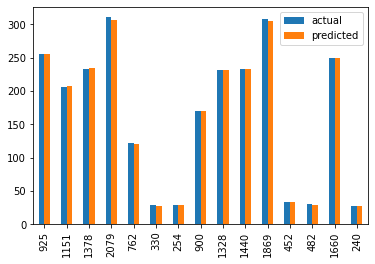

In [ ]:
# checking the plot for actual and predicted value
dataframe.head(15).plot(kind='bar')

# **CONCLUSION**

This project should be taken only as linear regression project and not as a investing tool, Because stock price can never be actually predicted, It is determined by lot of factors, This project is only for understanding purpose.